In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-note-authentication-uci-data/BankNote_Authentication.csv


In [31]:
df = pd.read_csv('/kaggle/input/bank-note-authentication-uci-data/BankNote_Authentication.csv')

In [32]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# **EDA**

<Axes: xlabel='class', ylabel='count'>

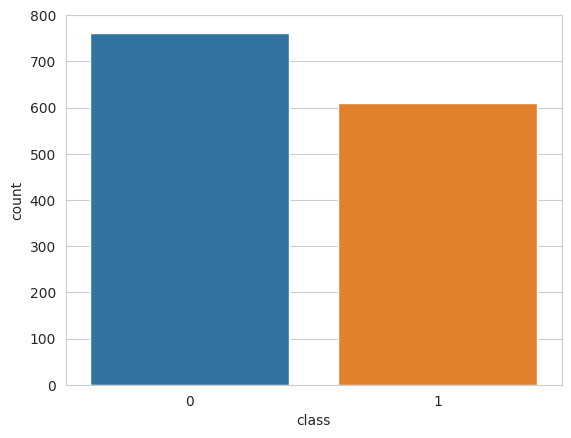

In [33]:
sns.set_style('whitegrid')

sns.countplot(x='class', data=df)

In [34]:
import warnings

warnings.filterwarnings('ignore')

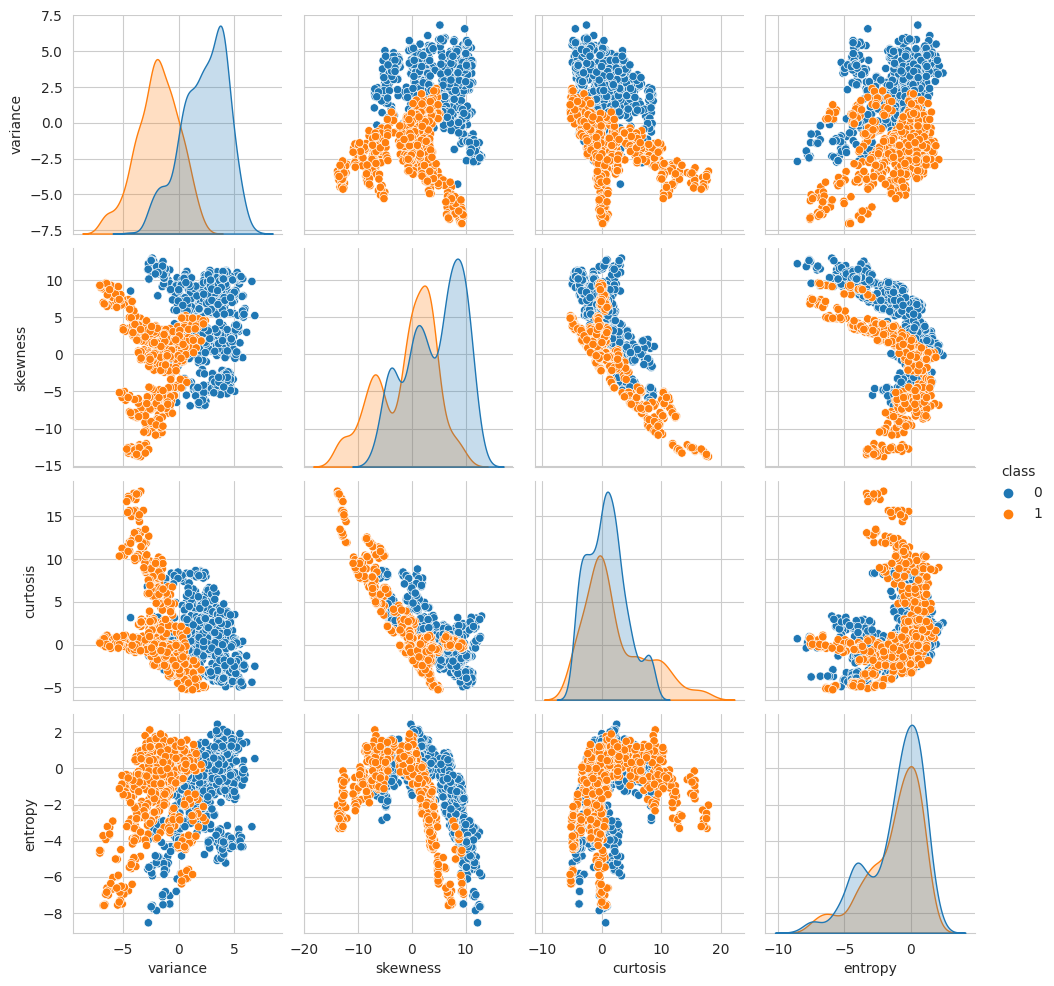

In [35]:
sns.pairplot(df, hue='class')

# **Data Preparation**

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
scaler.fit(df.drop('class', axis=1))

StandardScaler()

In [39]:
df_scaled = scaler.fit_transform(df.drop('class', axis=1))

In [40]:
df_feat = pd.DataFrame(df_scaled, columns=df.columns[:-1])
df_feat.head()

,variance,skewness,curtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


# **Train Test Split**

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = df_feat

In [43]:
y = df['class']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# **Tensorflow**

In [45]:
from tensorflow import keras
from tensorflow.keras import layers

In [46]:
X.columns

Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object')

In [47]:
model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=(4, )),
    layers.Dense(4, activation='relu'),
    layers.Dense(2, activation='sigmoid')
])

In [52]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [53]:
model.fit(X_train, y_train, epochs=60, batch_size=64)

Epoch 1/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6279 - sparse_categorical_accuracy: 0.6723
Epoch 2/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6202 - sparse_categorical_accuracy: 0.6723 
Epoch 3/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6020 - sparse_categorical_accuracy: 0.7113 
Epoch 4/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5890 - sparse_categorical_accuracy: 0.7146 
Epoch 5/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5723 - sparse_categorical_accuracy: 0.7160 
Epoch 6/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5533 - sparse_categorical_accuracy: 0.7506 
Epoch 7/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5567 - sparse_categorical_accuracy: 0.7236 
Epoch 8/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5263 - sparse_categorical_accuracy: 0.7647 
Epoch 9/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5208 - sparse_categorical_accuracy: 0.7684 
Epoch 10/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5099

In [55]:
loss, accuracy = model.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0345 - sparse_categorical_accuracy: 0.9772 


In [58]:
final_pred = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [59]:
final_pred = [np.argmax(res) for res in final_pred]

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
print(confusion_matrix(y_test, final_pred), classification_report(y_test, final_pred), sep='\n')

[[236   8]
 [  1 167]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       244
           1       0.95      0.99      0.97       168

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412

